In [1]:
import nltk
from nltk.corpus import words, brown
import string
import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
nltk.download('words')
nltk.download('brown')
%matplotlib inline

[nltk_data] Downloading package words to
[nltk_data]     /Users/evanagovino/nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading package brown to
[nltk_data]     /Users/evanagovino/nltk_data...
[nltk_data]   Package brown is already up-to-date!


## Create Corpus

In [2]:
word_list_words = list(words.words())
word_list_brown = list(brown.words())
five_letter_words_words = list(set([i.lower() for i in word_list_words if len(i) == 5 and i.isalpha()]))
five_letter_words_brown = [i.lower() for i in word_list_brown if len(i) == 5 and i.isalpha() and i in five_letter_words_words]

In [3]:
df = pd.DataFrame()
df['words'] = five_letter_words_brown
df = df['words'].value_counts().reset_index()
df.columns = ['word', 'frequency']

In [4]:
df[df['frequency'] > 3].tail(10)

,word,frequency
1111,dizzy,4
1112,weigh,4
1113,tutor,4
1114,scarf,4
1115,verve,4
1116,freak,4
1117,altar,4
1118,adept,4
1119,growl,4
1120,dryly,4


In [5]:
df[df['frequency'] == 1].tail(10)

,word,frequency
1922,thine,1
1923,stunt,1
1924,limbo,1
1925,toxin,1
1926,tilth,1
1927,cilia,1
1928,leggy,1
1929,meaty,1
1930,peaky,1
1931,fluke,1


In [6]:
five_letter_words = list(df[df['frequency'] >= 4]['word'])

## Wordle + Corpus Functions

In [7]:
class Wordle():

    def __init__(self, answer):
        self.answer = list(answer)
        self.set_values = [''] * len(self.answer)
        self.disregarded_letters = []
        self.letters_without_placements = {}
        
    def clean(self):
        for letter in list(self.letters_without_placements):
            if letter in self.set_values:
                self.letters_without_placements.pop(letter, None)

    def make_guess(self, guess, print_results=True, corpus=None):
        assert len(guess) == len(self.answer), 'Guess must have same number of words as answer!'
        if corpus:
            assert guess in corpus, 'Guess is not a word!'
        for position, value in enumerate(guess):
            if value == self.answer[position]:
                self.set_values[position] = value
            elif value in self.answer:
                if value in self.letters_without_placements:
                    if position not in self.letters_without_placements[value]:
                        self.letters_without_placements[value].append(position)
                else:
                    self.letters_without_placements[value] = [position]
            elif value not in self.disregarded_letters:
                self.disregarded_letters.append(value)
        self.clean()
        if print_results:
            print('')
            print(f'Guess: {guess}')
            print('Confirmed Values:', self.set_values)
            print('Confirmed Letters Not in Word', self.disregarded_letters)
            print('Confirmed Letters In Word, Not At Position', self.letters_without_placements)
            print('')
        return self.set_values, self.disregarded_letters, self.letters_without_placements


In [8]:
w = Wordle('treat')
w.make_guess('meats')


Guess: meats
Confirmed Values: ['', '', '', '', '']
Confirmed Letters Not in Word ['m', 's']
Confirmed Letters In Word, Not At Position {'e': [1], 'a': [2], 't': [3]}



(['', '', '', '', ''], ['m', 's'], {'e': [1], 'a': [2], 't': [3]})

In [9]:
w.make_guess('steam')


Guess: steam
Confirmed Values: ['', '', 'e', 'a', '']
Confirmed Letters Not in Word ['m', 's']
Confirmed Letters In Word, Not At Position {'t': [3, 1]}



(['', '', 'e', 'a', ''], ['m', 's'], {'t': [3, 1]})

In [10]:
w.make_guess('treat')


Guess: treat
Confirmed Values: ['t', 'r', 'e', 'a', 't']
Confirmed Letters Not in Word ['m', 's']
Confirmed Letters In Word, Not At Position {}



(['t', 'r', 'e', 'a', 't'], ['m', 's'], {})

In [11]:
class Corpus():
    
    def __init__(self, initial_corpus):
        self.corpus = initial_corpus
        
    def remove_letter(self, letter):
        self.corpus = [i for i in self.corpus if letter not in i]
        
    def filter_letter_correct_position(self, letter, position):
        if letter != '':
            self.corpus = [i for i in self.corpus if i[position] == letter]
        
    def filter_letter_incorrect_position(self, letter, position):
        self.corpus = [i for i in self.corpus if letter in i and i[position] != letter]
        
    def generate_word(self):
        return random.choice(self.corpus)

## Play Wordle

In [12]:
def play_wordle(corpus, n_guesses=6, print_results=True):
    w = Wordle(random.choice(corpus))
    c = Corpus(corpus)
    success = False
    for attempt in range(n_guesses):
        guess = c.generate_word()
        set_letters, disregarded_letters, letters_without_placements = w.make_guess(guess, print_results=print_results)
        if list(guess) == w.answer:
            success = True
            break
        for position, letter in enumerate(set_letters):
            c.filter_letter_correct_position(letter, position)
        for letter in letters_without_placements:
            for position in letters_without_placements[letter]:
                c.filter_letter_incorrect_position(letter, position)
        for letter in disregarded_letters:
            c.remove_letter(letter)
    if success:
        return success, attempt + 1
    else:
        return success,0

In [13]:
play_wordle(five_letter_words)


Guess: point
Confirmed Values: ['', '', '', '', '']
Confirmed Letters Not in Word ['p', 'i', 'n', 't']
Confirmed Letters In Word, Not At Position {'o': [1]}


Guess: broke
Confirmed Values: ['b', 'r', 'o', '', '']
Confirmed Letters Not in Word ['p', 'i', 'n', 't', 'k', 'e']
Confirmed Letters In Word, Not At Position {}


Guess: brood
Confirmed Values: ['b', 'r', 'o', '', 'd']
Confirmed Letters Not in Word ['p', 'i', 'n', 't', 'k', 'e']
Confirmed Letters In Word, Not At Position {}


Guess: brood
Confirmed Values: ['b', 'r', 'o', '', 'd']
Confirmed Letters Not in Word ['p', 'i', 'n', 't', 'k', 'e']
Confirmed Letters In Word, Not At Position {}


Guess: broad
Confirmed Values: ['b', 'r', 'o', 'a', 'd']
Confirmed Letters Not in Word ['p', 'i', 'n', 't', 'k', 'e']
Confirmed Letters In Word, Not At Position {}



(True, 5)

In [14]:
all_success = []
all_tries = []
for guess in range(10000):
    success, n_tries = play_wordle(five_letter_words, n_guesses=6, print_results=False)
    all_success.append(success)
    all_tries.append(n_tries)

In [15]:
np.sum(all_success) / len(all_success)

0.9847

<BarContainer object of 6 artists>

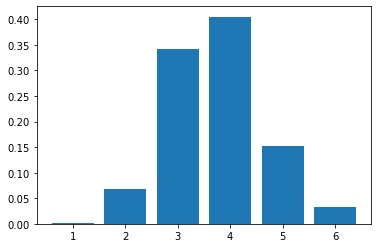

In [16]:
count, frequency = np.unique([i for i in all_tries if i > 0], return_counts=True)
plt.bar(count, frequency / sum(frequency))

In [17]:
np.mean([i for i in all_tries if i > 0])

3.739717680511831

## Play Wordle With Initial Guess

In [18]:
def play_wordle_initial_guess(corpus, initial_guess, n_guesses=6, print_results=True):
    w = Wordle(random.choice(corpus))
    c = Corpus(corpus)
    success = False
    num_eliminated = 0
    for attempt in range(n_guesses):
        if attempt == 0:
            guess = initial_guess
        else:
            guess = c.generate_word()
        set_letters, disregarded_letters, letters_without_placements = w.make_guess(guess, print_results=print_results)
        if list(guess) == w.answer:
            success = True
            break
        for position, letter in enumerate(set_letters):
            c.filter_letter_correct_position(letter, position)
        for letter in letters_without_placements:
            for position in letters_without_placements[letter]:
                c.filter_letter_incorrect_position(letter, position)
        for letter in disregarded_letters:
            c.remove_letter(letter)
        if attempt == 0:
            num_eliminated = len(corpus) - len(c.corpus)
    if success:
        return success, attempt + 1, num_eliminated
    else:
        return success, 0, num_eliminated

In [19]:
play_wordle_initial_guess(five_letter_words, 'steam')


Guess: steam
Confirmed Values: ['', '', '', '', '']
Confirmed Letters Not in Word ['s', 'a']
Confirmed Letters In Word, Not At Position {'t': [1], 'e': [2], 'm': [4]}


Guess: motel
Confirmed Values: ['m', '', 't', 'e', '']
Confirmed Letters Not in Word ['s', 'a', 'o', 'l']
Confirmed Letters In Word, Not At Position {}


Guess: meter
Confirmed Values: ['m', 'e', 't', 'e', 'r']
Confirmed Letters Not in Word ['s', 'a', 'o', 'l']
Confirmed Letters In Word, Not At Position {}



(True, 3, 1115)

### Different Words as First Guesses

In [20]:
all_success = []
all_attempts = []
all_num_eliminated = []
for position, word in enumerate(five_letter_words):
    total_success = []
    total_attempts = []
    total_num_eliminated = []
    for i in range(1000):
        success, n_tries, num_eliminated = play_wordle_initial_guess(five_letter_words, initial_guess=word, n_guesses=6, print_results=False)
        total_success.append(success)
        total_attempts.append(n_tries)
        total_num_eliminated.append(num_eliminated)
    all_success.append(np.mean(total_success))
    all_attempts.append(np.sum([i for i in total_attempts if i > 0]))
    all_num_eliminated.append(np.mean(total_num_eliminated))

In [21]:
df = pd.DataFrame()
df['words'] = five_letter_words
df['success'] = [i for i in all_success]
df['pct_eliminated'] = [i/len(five_letter_words) for i in all_num_eliminated]
df['n_attempts'] = [i for i in all_attempts] / (df['success'] * 1000)
df['n_attempts_inverse'] = 6 - df['n_attempts']

In [22]:
df['pct_eliminated'].median()

0.9247975022301518

/Users/evanagovino/miniconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Percentage of Words Eliminated')

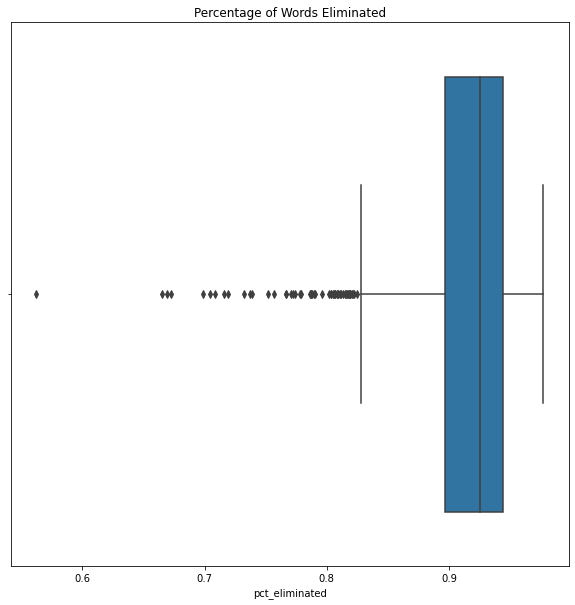

In [23]:
plt.figure(figsize=(10,10))
sns.boxplot(df['pct_eliminated'])
plt.title('Percentage of Words Eliminated')

Text(0, 0.5, 'Number of Attemps')

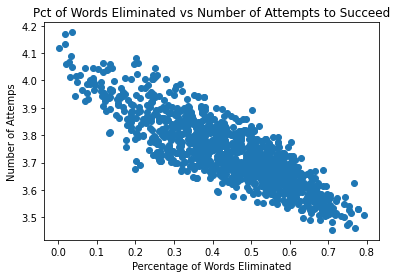

In [24]:
plt.scatter(np.power(df['pct_eliminated'], 10), df['n_attempts'])
plt.title('Pct of Words Eliminated vs Number of Attempts to Succeed')
plt.xlabel('Percentage of Words Eliminated')
plt.ylabel('Number of Attemps')

Text(0, 0.5, 'Probability of Success')

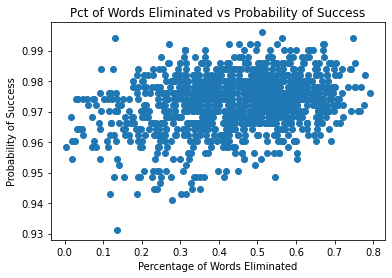

In [25]:
plt.scatter(np.power(df['pct_eliminated'], 10), np.power(df['success'], 2))
plt.title('Pct of Words Eliminated vs Probability of Success')
plt.xlabel('Percentage of Words Eliminated')
plt.ylabel('Probability of Success')

In [26]:
df.sort_values('n_attempts', ascending=True).head(10)

,words,success,pct_eliminated,n_attempts,n_attempts_inverse
608,react,0.986,0.966215,3.454361,2.545639
930,slate,0.989,0.974001,3.463094,2.536906
522,tales,0.997,0.971442,3.472417,2.527583
115,trade,0.989,0.971996,3.479272,2.520728
93,tried,0.987,0.966397,3.483283,2.516717
302,trend,0.991,0.962104,3.491423,2.508577
838,beast,0.986,0.958075,3.491886,2.508114
927,laden,0.987,0.955616,3.498480,2.501520
465,trace,0.985,0.970484,3.500508,2.499492
43,least,0.989,0.969501,3.503539,2.496461


## Look at Vowels and Consonants

In [27]:
df['vowels'] = df['words'].apply(lambda x: len([i for i in x if i in ['a','e','i','o','u']]))
df['unique_vowels'] = df['words'].apply(lambda x: len(set([i for i in x if i in ['a','e','i','o','u']])))
df['common_consonants'] = df['words'].apply(lambda x: len([i for i in x if i in ['r','t','s']]))
df['unique_common_consonants'] = df['words'].apply(lambda x: len([i for i in x if i in ['r','t','s']]))

Text(0, 0.5, 'Pct of Words')

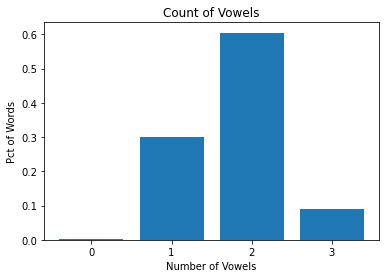

In [28]:
vowels = df['vowels'].value_counts(normalize=True).reset_index().sort_values('index')
vowels.columns = ['vowel_count', 'pct_of_words']
plt.bar(vowels['vowel_count'].astype('str'), vowels['pct_of_words'])
plt.title('Count of Vowels')
plt.xlabel('Number of Vowels')
plt.ylabel('Pct of Words')

Text(0, 0.5, 'Pct of Words')

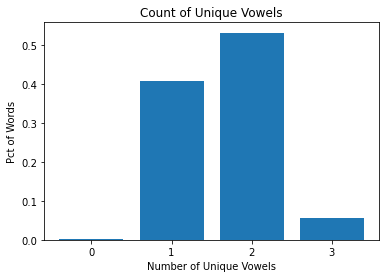

In [29]:
vowels = df['unique_vowels'].value_counts(normalize=True).reset_index().sort_values('index')
vowels.columns = ['vowel_count', 'pct_of_words']
plt.bar(vowels['vowel_count'].astype('str'), vowels['pct_of_words'])
plt.title('Count of Unique Vowels')
plt.xlabel('Number of Unique Vowels')
plt.ylabel('Pct of Words')

Text(0.5, 1.0, 'Frequency of Letters')

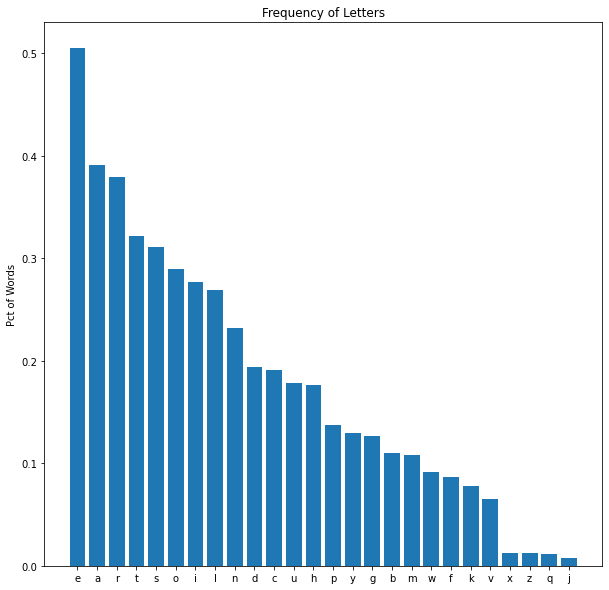

In [30]:
letter_count = pd.DataFrame()
letter_count['letters'] = list(string.ascii_lowercase)
letter_count['letter_count'] = letter_count['letters'].apply(lambda x: len([j for j in five_letter_words if x in j]))
letter_count = letter_count.sort_values('letter_count', ascending=False)
plt.figure(figsize=(10,10))
plt.bar(letter_count['letters'], letter_count['letter_count'] / len(five_letter_words))
plt.ylabel('Pct of Words')
plt.title('Frequency of Letters')

In [31]:
results = df.groupby(['unique_common_consonants', 'unique_vowels'])[['success', 'pct_eliminated', 'n_attempts_inverse']].mean()
results.style.background_gradient(cmap='Blues')

In [32]:
df[(df['unique_common_consonants'] == 2) & (df['unique_vowels'] >= 2)].sort_values('n_attempts').head(10)

,words,success,pct_eliminated,n_attempts,n_attempts_inverse,vowels,unique_vowels,common_consonants,unique_common_consonants
608,react,0.986,0.966215,3.454361,2.545639,2,2,2,2
930,slate,0.989,0.974001,3.463094,2.536906,2,2,2,2
522,tales,0.997,0.971442,3.472417,2.527583,2,2,2,2
115,trade,0.989,0.971996,3.479272,2.520728,2,2,2,2
93,tried,0.987,0.966397,3.483283,2.516717,2,2,2,2
838,beast,0.986,0.958075,3.491886,2.508114,2,2,2,2
465,trace,0.985,0.970484,3.500508,2.499492,2,2,2,2
43,least,0.989,0.969501,3.503539,2.496461,2,2,2,2
938,steal,0.992,0.964575,3.507056,2.492944,2,2,2,2
756,rated,0.988,0.967384,3.509109,2.490891,2,2,2,2
